# Calculating Velocity Aberration

Velocity aberration is the apparent shift in the position of a star or celestial object caused by the motion of the observer relative to the speed of light. This effect is appreciable in space missions where we are moving at high velocities and have a small pixel scale. 

You can use `lkorbit` to calculate this position.

In [1]:
from lkorbit import KeplerSpacecraft
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

First we initialize the spacecraft

In [2]:
ks = KeplerSpacecraft()

Then we select a time range. I am selecting a year near the start of the mission

In [3]:
t = np.linspace(ks.start_time.jd + 10, ks.start_time.jd + 376, 1000)
t = Time(t, format='jd')

t

<Time object: scale='utc' format='jd' value=[2454907.76592593 2454908.13229229 2454908.49865866 ... 2455273.03319319
 2455273.39955956 2455273.76592593]>

We can now calculate velocity aberration for a point in space. Let's pick the center of the Kepler FOV

In [4]:
ra, dec = 290.6666666666667, 44.5
ra_aberrated, dec_aberrated = ks.get_velocity_aberrated_positions(time=t, ra=ra, dec=dec)

[Text(0.5, 0, 'RA [deg]'),
 Text(0, 0.5, 'Dec [deg]'),
 Text(0.5, 1.0, 'Kepler FOV')]

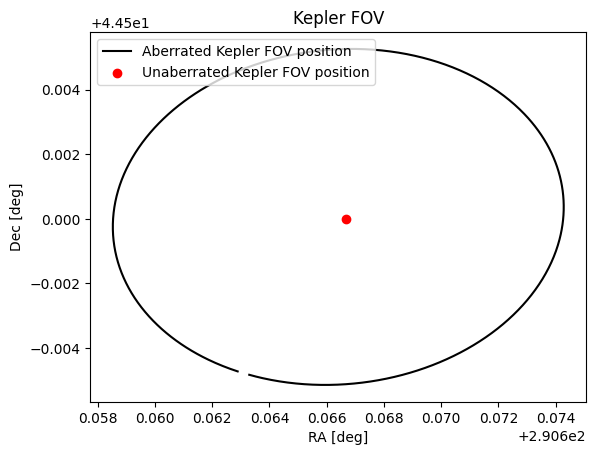

In [5]:
fig, ax = plt.subplots()
ax.plot(ra_aberrated, dec_aberrated, c='k', label='Aberrated Kepler FOV position')
ax.scatter(ra, dec, label='Unaberrated Kepler FOV position', c='r')
ax.legend(loc='upper left')
ax.set(xlabel='RA [deg]', ylabel='Dec [deg]', title='Kepler FOV')

Over the course of a year, the focal plane is aberrated due to Kepler's high velocity. Let's look at the magnitude of this effect:

In [6]:
max_aberration = (((ra_aberrated - ra)**2 + (dec_aberrated - dec)**2)*0.5).max() * 3600
print(max_aberration, " arcseconds")

0.1193730463143019  arcseconds


During observtions, missions such as Kepler and TESS must repoint the observatory in order to counter this effect, and maintain a stable pointing. However, this effect is different depending on where in the focal plane you are. For example, let's look at the velocity aberration at the target Kepler-10.

In [7]:
kep10_ra, kep10_dec = 285.6794224553767, +50.2413060048164
kep10_ra_aberrated, kep10_dec_aberrated = ks.get_velocity_aberrated_positions(time=t, ra=kep10_ra, dec=kep10_dec)

Below I show the velocity aberrated position for both the FOV and Kepler-10 

[Text(0.5, 0, 'RA [deg]'),
 Text(0, 0.5, 'Dec [deg]'),
 Text(0.5, 1.0, 'Velocity Aberration for FOV compared with Kepler-10')]

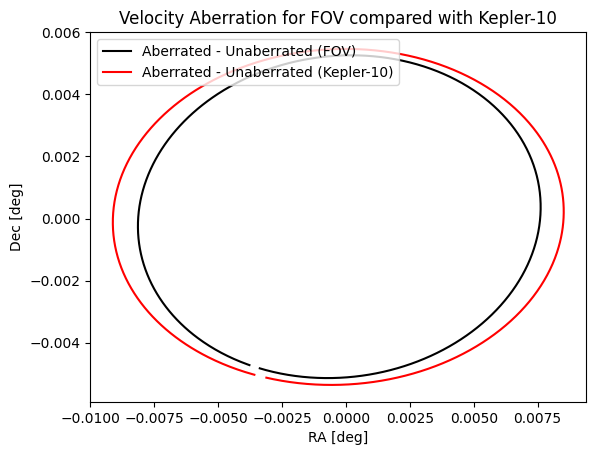

In [8]:
fig, ax = plt.subplots()
ax.plot(ra_aberrated - ra, dec_aberrated - dec, c='k', label='Aberrated - Unaberrated (FOV)')
ax.plot(kep10_ra_aberrated - kep10_ra, kep10_dec_aberrated - kep10_dec, c='r', label='Aberrated - Unaberrated (Kepler-10)')
ax.legend(loc='upper left')
ax.set(xlabel='RA [deg]', ylabel='Dec [deg]', title='Velocity Aberration for FOV compared with Kepler-10')

You can see because of the different position on the focal plane the velocity aberration for Kepler-10 is actually larger than for the FOV. 

The difference between these two is known as **differential velocity aberration** or DVA. DVA is an effect that can not be mitigated by repointing the spacecraft to account for reletavistic effects. 

`lkorbit` is able to provide **velocity aberration** estimates, but not currently able to provide **differential velocity** estimates. In order to estimate differential velocity we would require the pointing of the guide stars. This may be attempted in future versions.